In [25]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os

In [26]:
all_files = os.listdir('data')
most_recent_file = all_files[-21] # most recent file will be last alphabetically

PULLEY_RADIUS = 0.035 # in meters
TICKS_PER_REV = 2048 # encoder ticks per motor revolution

table = pd.read_csv('data/' + most_recent_file)

table['error x (cm)'] = table['target x (cm)'] - table['actual x (cm)']
table['error y (cm)'] = table['target y (cm)'] - table['actual y (cm)']

# table['actual theta l (ticks)'] = -(table['actual x (cm)'] + table['actual y (cm)']) / PULLEY_RADIUS * TICKS_PER_REV / (2*np.pi*100)
# table['actual theta r (ticks)'] = -(table['actual x (cm)'] - table['actual y (cm)']) / PULLEY_RADIUS * TICKS_PER_REV / (2*np.pi*100)

# table['target theta l (ticks)'] = -(table['target x (cm)'] + table['target y (cm)']) / PULLEY_RADIUS * TICKS_PER_REV / (2*np.pi*100)
# table['target theta r (ticks)'] = -(table['target x (cm)'] - table['target y (cm)']) / PULLEY_RADIUS * TICKS_PER_REV / (2*np.pi*100)


# plt.figure()
# plotted_values = ['target theta l (ticks)', 'actual theta l (ticks)']

# for val in plotted_values:
#     plt.plot(table['time (s)'], table[val], marker='o', markersize=3, linestyle='none')

# plt.figure()
# plotted_values = ['target theta r (ticks)', 'actual theta r (ticks)']

# for val in plotted_values:
#     plt.plot(table['time (s)'], table[val], marker='o', markersize=3, linestyle='none')

Intercept Error:
X:  -7.66 cm
Y:  -3.28 cm


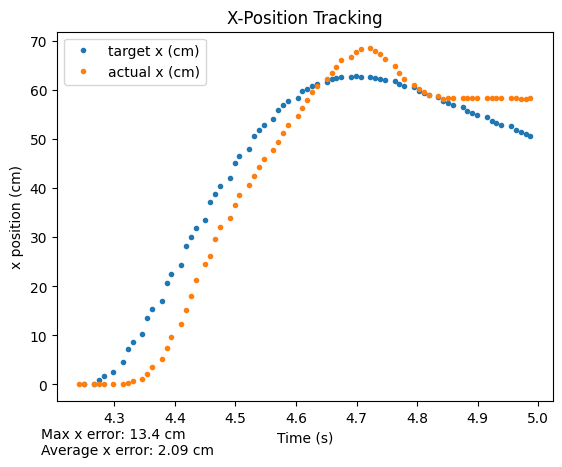

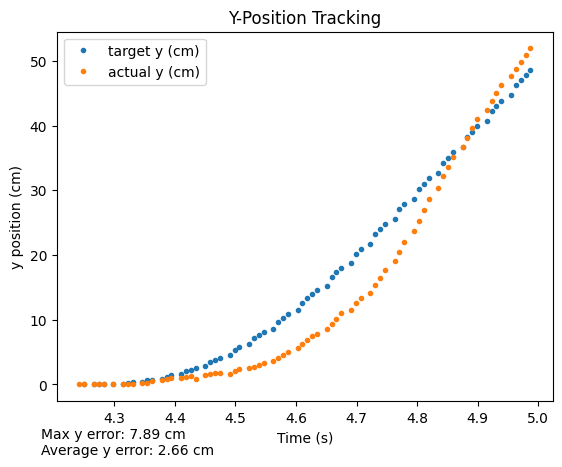

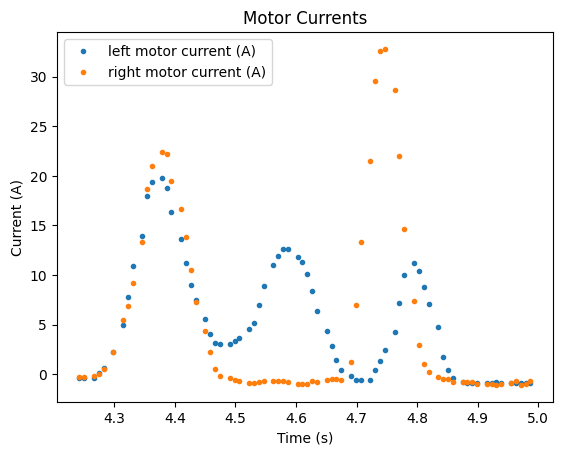

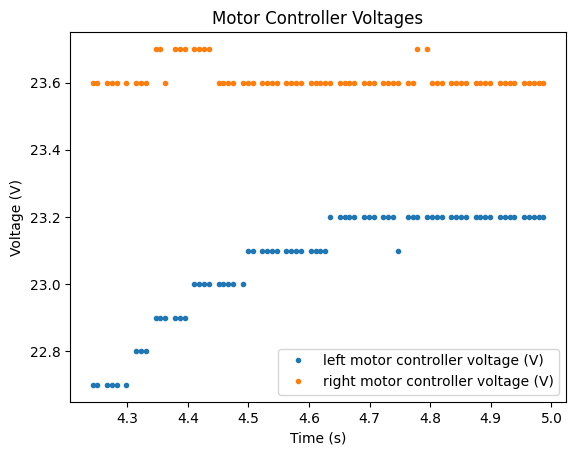

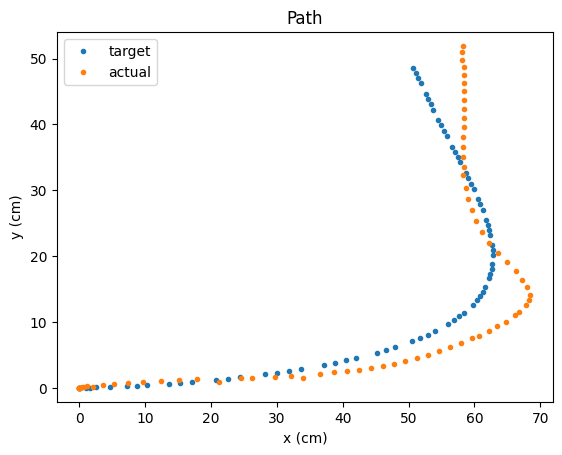

In [27]:
#Plot target and actual X
plt.figure()
plotted_values = ['target x (cm)', 'actual x (cm)']

for val in plotted_values:
    plt.plot(table['time (s)'], table[val], marker='o', markersize=3, linestyle='none')

plt.legend(plotted_values)
plt.title('X-Position Tracking')
plt.xlabel('Time (s)')
plt.ylabel('x position (cm)')
plt.figtext(0.1, 0, f"\nMax x error: {round(table['error x (cm)'].max(),2)} cm\n" \
    f"Average x error: {round(table['error x (cm)'].mean(),2)} cm")

#Plot target and actual Y
plt.figure()
plotted_values = ['target y (cm)', 'actual y (cm)']

for val in plotted_values:
    plt.plot(table['time (s)'], table[val], marker='o', markersize=3, linestyle='none')

plt.legend(plotted_values)
plt.title('Y-Position Tracking')
plt.xlabel('Time (s)')
plt.ylabel('y position (cm)')
plt.figtext(0.1, 0, f"\nMax y error: {round(table['error y (cm)'].max(),2)} cm\n" \
    f"Average y error: {round(table['error y (cm)'].mean(),2)} cm")

#Plot Motor Currents
plt.figure()
plotted_values = ['left motor current (A)', 'right motor current (A)']

for val in plotted_values:
    plt.plot(table['time (s)'], table[val], marker='o', markersize=3, linestyle='none')

plt.legend(plotted_values)
plt.title('Motor Currents')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')

#Plot Motor Controller Voltages
plt.figure()
plotted_values = ['left motor controller voltage (V)', 'right motor controller voltage (V)']

for val in plotted_values:
    plt.plot(table['time (s)'], table[val], marker='o', markersize=3, linestyle='none')

plt.legend(plotted_values)
plt.title('Motor Controller Voltages')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

#Plot Paddle Path
plt.figure()
# plotted_values = ['actual x (cm)', 'actual y (cm)']

# for val in plotted_values:
plt.plot(table['target x (cm)'], table['target y (cm)'], marker='o', markersize=3, linestyle='none')
plt.plot(table['actual x (cm)'], table['actual y (cm)'], marker='o', markersize=3, linestyle='none')

plt.axis('equal')
plt.title("Path")
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.legend(['target', 'actual'])

print("Intercept Error:\nX: ", round(table['error x (cm)'].iloc[-1],2), "cm\nY: ", round(table['error y (cm)'].iloc[-1],2), "cm")